# 机器学习工程师纳米学位
## 非监督式学习
## 项目：创建客户细分

欢迎来到机器学习工程师纳米学位的第三个实战项目！在此 notebook 中，我们已经为你提供了一些模板代码，你需要实现其他必要功能，以便成功地完成此项目。以**实现**开头的部分表示你必须为下面的代码块提供额外的功能。我们将在每部分提供说明，并在代码块中用 `'TODO'` 语句标记具体的实现要求。请务必仔细阅读说明！

除了实现代码之外，你必须回答一些问题，这些问题与项目和你的实现有关。每个部分需要回答的问题都在开头以**问题 X** 标记。请仔细阅读每个问题并在下面以**答案：**开头的文本框中提供详细的答案。我们将根据你的每个问题答案和所提供的实现代码评估你提交的项目。

>**注意：**你可以使用键盘快捷键 **Shift + Enter** 执行代码和 Markdown 单元格。此外，可以通过双击进入编辑模式，编辑 Markdown 单元格。

## 开始

在此项目中，你将分析一个数据集，该数据集包含关于来自多种产品类别的各种客户年度消费额（*货币单位*计价）的数据。该项目的目标之一是准确地描述与批发商进行交易的不同类型的客户之间的差别。这样可以使分销商清晰地了解如何安排送货服务，以便满足每位客户的需求。

你可以在 [UCI 机器学习代码库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到此项目的数据集。对于此项目，我们将忽略特征 `'Channel'` 和 `'Region'`，重点分析记录的六个客户产品类别。

运行以下代码块，以加载批发客户数据集以及几个此项目所需的必要 Python 库。你可以根据系统报告的数据集大小判断数据集是否已成功加载。

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## 数据探索
在此部分，你将通过可视化图表和代码开始探索数据，并了解每个特征相互之间的关系。你将观察数据集的统计学描述内容，考虑每个特征之间的联系，从数据集中选择几个样本数据集并在整个项目期间跟踪这几个样本。

运行以下代码块，以观察数据集的统计学描述内容。注意数据集由  6 个重要的产品类别构成：**“Fresh”**、**“Milk”**、**“Grocery”**、**“Frozen”**、**“Detergents_Paper”**和**“Delicatessen”**。思考每个类别代表你可以购买的哪些产品。

In [4]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### 实现：选择样本
为了更好地通过分析了解客户以及他们的数据会如何变化，最好的方式是选择几个样本数据点并更详细地分析这些数据点。在以下代码块中，向 `indices` 列表中添加**三个**你所选的索引，表示将跟踪的客户。建议尝试不同的样本集合，直到获得相互之间差异很大的客户。

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100, 200, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1   3067  13240    23127    3941              9959           731
2  16448   6243     6360     824              2662          2005

### 问题 1
查看样本客户对应的每个产品类别的总购买成本和上述统计学描述内容。  

* 你所选的每个样本可以代表什么样的（客户）场所？

**提示：**场所示例包括市场、咖啡厅、熟食店、零售店等地点。避免使用具体的名称，例如在将样本客户描述为餐厅时使用“麦当劳”。你可以使用参考均值与你的样本进行比较。均值如下所示：

* Fresh：12000.2977
* Milk：5796.2
* Grocery：7951.277273
* Frozen：3071.931818
* Detergents_paper：2881.4
* Delicatessen：1524.8

知道这些均值后，你的样本比较结果如何？有助于你确定他们可能属于哪种场所吗？

**答案：**
1. 0样本在Milk，Grocery，Frozen，Detergents_paper，Delicatessen的消费超过了均值，其中Milk，Grocery，Detergents_paper消费较高，可能是咖啡厅；
2. 1样本在Milk，Grocery，Frozen，Detergents_paper的消费超过了均值，其中Milk，Grocery，Detergents_paper消费较高，可能也是咖啡厅；
3. 2样本在Fresh，Milk，Delicatessen的消费超过了均值，在这几种产品都有消费但不是特别高，可能是零售店。



### 实现：特征相关性
一个值得考虑的有趣问题是，在六个产品类别中是否有一个（或多个）类别实际上在了解客户购买情况时相互有关联性。也就是说，是否能够判断购买一定量的某个类别产品的客户也一定会购买数量成比例的其他类别的产品？我们可以通过以下方式轻松地做出这一判断：删除某个特征，并用一部分数据训练监督式回归学习器，然后对模型评估所删除特征的效果进行评分。

你需要在下面的代码块中实现以下步骤：
 - 通过使用 `DataFrame.drop` 函数删除你所选的特征，为 `new_data` 分配一个数据副本。
 - 使用 `sklearn.cross_validation.train_test_split` 将数据集拆分为训练集和测试集。
   - 使用删除的特征作为目标标签。将 `test_size` 设为 `0.25` 并设置 `random_state`。
 - 导入决策树回归器，设置 `random_state`，并将学习器拟合到训练数据中。
 - 使用回归器 `score` 函数报告测试集的预测分数。

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
select_feature = 'Grocery'
y_data = data[select_feature]
new_data = data.drop(select_feature, axis=1)


# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, y_data, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)# 使每次随机生成的数是相同的，可以用来随机初始化相关参数
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.699248196675


/Users/jia/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 问题 2

* 你尝试预测的是哪个特征？
* 报告的预测分数是多少？
* 该特征对确定客户的消费习惯有影响吗？

**提示：**确定系数 `R^2` 的范围是 0 到 1，1 表示完美拟合。负的 `R^2` 表示模型无法拟合数据。如果特定特征的分数很低，则表明使用其他特征很难预测该特征点，因此在考虑相关性时这个特征很重要。

**答案：**
1. 使用'Grocery'
2. 测试分数：0.699248196675，接近0.7
3. 得分相对较高，因此该特征可以通过其他特征拟合得到，相关性较高，对预测用户消费习惯不是必要因素。

### 可视化特征分布图
为了更好地理解数据集，我们可以为数据中的六个产品特征分别构建一个散布矩阵。如果你发现你在上面尝试预测的特征与识别特定客户有关，那么下面的散布矩阵可能会显示该特征与其他特征之间没有任何关系。相反，如果你认为该特征与识别特定客户不相关，散布矩阵可能会显示该特征与数据中的另一个特征有关系。运行以下代码块，以生成散布矩阵。

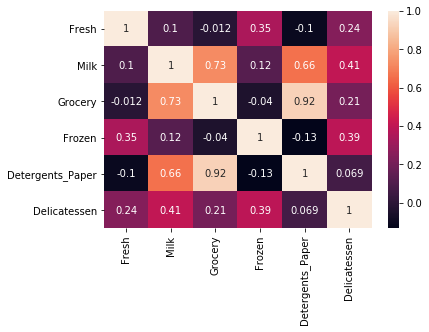

In [8]:
# Produce a scatter matrix for each pair of features in the data

# pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

import seaborn as sns
sns.heatmap(data.corr(), annot=True)


### 问题 3
* 将散布矩阵作为参考，讨论数据集的分布情况，尤其是正态性、离群值、大量接近 0 的数据点等。如果你需要区分某些图表，以便进一步阐述你的观点，也可以这么做。
* 有任何特征对存在某种联系吗？
* 能够佐证你尝试预测的特征存在相关性论点吗？
* 这些特征的数据分布情况如何？

**提示：**数据是正态分布的吗？ 大部分数据点都位于哪个位置？你可以使用 [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) 得出特征关系，然后使用 [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)（要提供给热图的数据是联系值。例如 `data.corr()`）可视化这些特征，以进一步获得信息。

**答案：**
1. 从散布矩阵看出存在相关性的特征对有：
'Grocery'和'Detergents_Paper', 'Grocery'和'Milk', 'Detergents_Paper'和'Milk'。
2. 通过data.corr()的热力图可以看出：
'Grocery'和'Detergents_Paper'相关性达到0.92，'Grocery'和'Milk'相关性为0.73，'Detergents_Paper'和'Milk'相关性为0.66。
证实这三个特征对是相关性前三的特征对。
3. 数据集中大部分数值都较小，有大量接近0的数据点，不是正态分布数据。

## 数据预处理
在此部分，你将预处理数据（对数据进行缩放并检测离群值，或许还会删除离群值），以便更好地表示客户数据。预处理数据通常是很关键的步骤，可以确保通过分析获得的结果有显著统计意义。

### 实现：特征缩放
如果数据不是正态分布数据，尤其是如果均值和中值差别很大（表明非常偏斜），通常[比较合适的方法](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics)是应用非线性缩放——尤其是对金融数据来说。实现这种缩放的一种方式是采用[博克斯-卡克斯检定](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，该检定会计算能缩小偏斜情况的最佳次方转换方式。适合大多数情况的更简单方式是采用自然对数。

你需要在下面的代码块中实现以下步骤：
 - 通过应用对数缩放将数据副本赋值给 `log_data`。你可以使用 `np.log` 函数完成这一步。
 - 在应用对数缩放后，将样本数据副本赋值给 `log_samples`。同样使用 `np.log`。

/Users/jia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


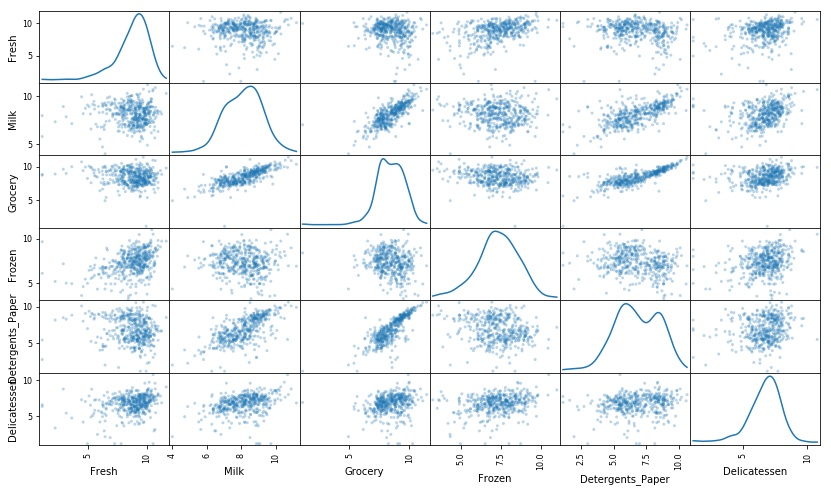

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在对数据应用自然对数缩放后，每个特征的分布应该看起来很正态了。对于你之前可能发现相互有关联的任何特征对，在此部分观察这种联系是否依然存在（是否比之前更明显）。

运行以下代码，看看在应用自然对数后样本数据有何变化。

In [10]:
# Display the log-transformed sample data
display(log_samples)

display(log_data.describe())

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.358243  8.959183   9.404590  8.087025          8.991562      8.015988
1  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  9.707959  8.739216   8.757784  6.714171          7.886833      7.603399

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.730544    8.121047    8.441169    7.301396          6.785972   
std      1.480071    1.081365    1.116172    1.284540          1.721020   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.048059    7.334981    7.674616    6.609678          5.548101   
50%      9.048286    8.196159    8.467057    7.330388          6.705018   
75%      9.737064    8.880480    9.273854    8.175896          8.274341   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    440.000000  
mean       6.665133  
std        1.310832  
min        1.098612  
25%        6.011875  
50%        6.872645  
75%        7.506728  
max       10.777768

### 实现：检测离群值
对于任何分享的数据预处理步骤来说，检测数据中的离群值都极为重要。如果结果考虑了离群值，那么这些离群值通常都会使结果出现偏斜。在判断什么样的数据属于离群值时，可以采用很多“一般规则”。在此项目中，我们将使用 [Tukey 方法检测离群值](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：*离群值步长*等于 1.5 倍四分位距 (IQR)。如果某个数据点的特征超出了该特征的离群值步长范围，则该特征属于异常特征。

你需要在下面的代码块中实现以下步骤：
 - 将给定特征的第 25 百分位值赋值给 `Q1`。 为此，请使用 `np.percentile`。
 - 将给定特征的第 75 百分位值赋值给 `Q3`。同样使用 `np.percentile`。
 - 将给定特征的离群值步长计算结果赋值给 `step`。
 - （可选步骤）通过向 `outliers` 列表添加索引，从数据集中删除某些数据点。

**注意：**如果你选择删除任何离群值，确保样本数据不包含任何此类数据点！  
实现这一步骤后，数据集将存储在变量 `good_data` 中。

In [11]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    print ("Data points considered outliers for the feature '{}':".format(feature))
    bad_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]  
    #print(type(bad_data))  df 
    #print(type(bad_data.index))  df  index
    #outliers.extend(list(bad_data.inedx))  
    outliers.extend(bad_data.index.tolist())
    display(bad_data)
    
# OPTIONAL: Select the indices for data points you wish to remove
#print(type(set(outliers)))  set  # 'set' object has no attribute 'tolist'
outliers = [val for val in list(set(outliers)) if outliers.count(val)>=2]
print(np.sort(outliers).tolist())

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

[65, 66, 75, 128, 154]


### 问题 4
* 根据上述定义，有任何数据点属于多个特征的离群值吗？
* 应该从数据集中删除这些数据点吗？
* 如果向 `outliers` 列表中添加了任何要移除的数据点，请解释为何这么做。

** 提示：**如果有数据点在多个类别中都属于离群值，思考下为何是这种情况，以及是否确实需要删除。此外注意离群值对 K 均值有何影响，以及这种影响对分析是否删除这些数据起到决定作用。

**答案：**
1. index为[65, 66, 75, 128, 154]的数据点在多类别中都属于离群值。
2. K-Means对离群值敏感，离群值会影响中心点的移动方向。因此需要删除一定的离群值。
3. 如果把在一个特征上的离群值都删了，会删除比例较大的数据，对整体数据会有影响，所以可以删除在两个及两个以上特征为离群值的数据。

## 特征转换
在此部分，你将利用主成分分析 (PCA) 得出批发客户数据的基本结构。因为对数据集使用 PCA 会计算哪些维度最适合最大化方差，我们将发现哪些特征组合最能描述客户。

### 实现：PCA

现在数据已经缩放为更正态的分布，并且删除了任何需要删除的离群值，现在可以向 `good_data` 应用 PCA，以发现哪些数据维度最适合最大化所涉及的特征的方差。除了发现这些维度之外，PCA 还将报告每个维度的*可解释方差比*——数据中有多少方差可以仅通过该维度进行解释。注意 PCA 的成分（维度）可以视为空间的新“特征”，但是它是数据中存在的原始特征的成分。

你需要在下面的代码块中实现以下步骤：
 - 导入 `sklearn.decomposition.PCA` 并将对 `good_data` 进行六维度 PCA 转化的结果赋值给 `pca`。
 - 使用 `pca.transform` 对 `log_samples` 应用 PCA 转化，并将结果赋值给 `pca_samples`。

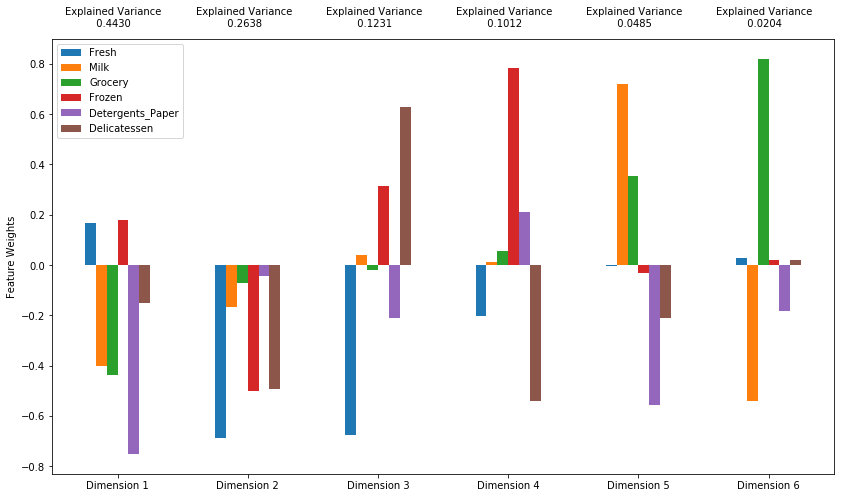

In [12]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### 问题 5

* 由第一个主成分和第二个主成分解释的数据方差* **总量** *是多少？
* 前四个主成分解释的数据方差是多少？
* 使用上面提供的可视化图表描述每个维度和每个维度解释的累积方程，侧重于每个维度最能表示哪些特征（包括能解释的正方差和负方差）。讨论前四个维度最能表示什么样的客户消费规律。

**提示：**特定维度的正增长对应的是*正加权*特征的_增长_以及*负加权*特征的_降低_。增长或降低比例由具体的特征权重决定。

**答案：**
1. 0.4430+0.2638=0.7068
2. 0.4430+0.2638+0.1231+0.1012=0.9311
3. 
第一个维度:'Milk', 'Grocery', 'Detergents_paper'的权重最大，代表咖啡店；
第二个维度:'Fresh', 'Frozen', 'Delicatessen'的权重最大，代表市场；
第三个维度:'Fresh', 'Frozen', 'Detergents_paper', 'Delicatessen'的权重最大，且'Fresh'和'Detergents_paper'为负权重，'Frozen'和'Delicatessen'为正权重，说明此类客户如果增加'Fresh'和'Detergents_paper'的购买则会降低'Frozen'和'Delicatessen'的购买；
第四个维度:'Frozen'和'Delicatessen'的权重最大，但一个为正权重，另一个为负权重，说明此类客户购买'Frozen'和'Delicatessen'最多，但又不会同时购买这两样产品。


### 观察
运行以下代码，看看经过对数转换的样本数据在六维空间里应用 PCA 转换后有何变化。观察样本数据点的前四个维度的数字值。看看与你一开始对样本数据点的判断是否一致。

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.3579      -1.7393       0.2210       0.2840      -0.5939   
1      -2.9903      -0.3645       0.2521       1.5653       0.1922   
2      -1.2804      -0.9587      -0.4701      -0.9124      -0.2345   

   Dimension 6  
0      -0.0148  
1       0.1244  
2      -0.2514

### 实现：降维
在使用主成分分析时，主要目标之一是降低数据维度，以便降低问题的复杂度。降维有一定的代价：使用的维度越少，则解释的总方差就越少。因此，为了了解有多少个维度对问题来说是必要维度，*累积可解释方差比*显得极为重要。此外，如果大量方差仅通过两个或三个维度进行了解释，则缩减的数据可以之后可视化。

你需要在下面的代码块中实现以下步骤：
 - 将对 `good_data` 进行二维拟合 PCA 转换的结果赋值给 `pca`。
 - 使用 `pca.transform` 对 `good_data` 进行 PCA 转换，并将结果赋值给 `reduced_data`。
 - 使用 `pca.transform` 应用 `log_samples`  PCA 转换，并将结果赋值给 `pca_samples`。

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码，看看经过对数转换的样本数据在仅使用二个维度并应用 PCA 转换后有何变化。观察前两个维度的值与六维空间里的 PCA 转换相比如何没有变化。

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.3579      -1.7393
1      -2.9903      -0.3645
2      -1.2804      -0.9587

## 可视化双标图
双标图是一种散点图，每个数据点由主成分上的分数表示。坐标轴是主成分（在此图中是 `Dimension 1` 和 `Dimension 2`）。此外，双标图显示了原始特征沿着成分的投影情况。双标图可以帮助我们解释降维数据，并发现主成分与原始特征之间的关系。

运行以下代码单元格，以生成降维数据双标图。

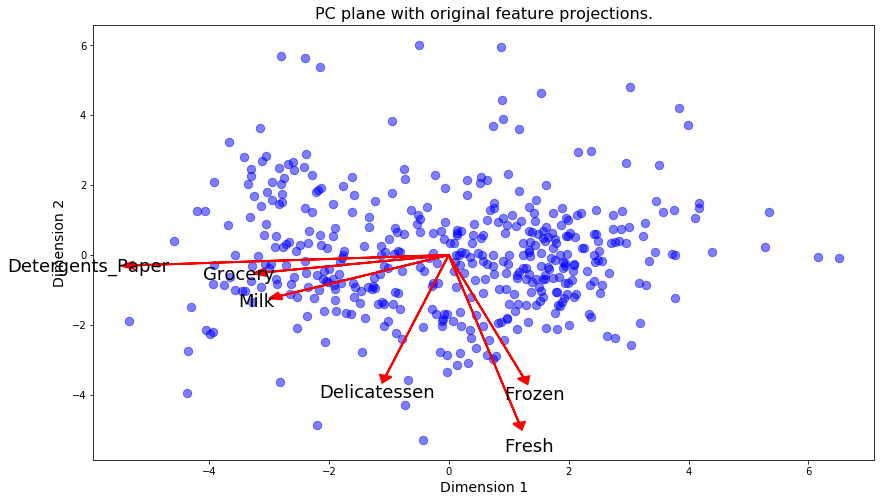

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### 观察

获得原始特征投影（红色部分）后，更容易解释每个点在散点图中的相对位置。例如，图中右下角的点更有可能对应于在 `'Milk'`、`'Grocery'` 和 `'Detergents_Paper'` 上花费很多、但是在其他产品类别上花费不多的客户。

根据该双标图，哪些原始特征与第一个成分的关系最紧密？哪些特征与第二个成分的关系最紧密呢？这些观察结果与你之前获得的 pca_results 图表吻合吗？ 

## 聚类

在此部分，你将选择使用 K 均值聚类算法或高斯混合模型聚类算法发现数据中隐藏的各种客户细分。然后，你将通过将数据点重新转换成原始维度和范围，从聚类中还原具体的数据点以了解它们的显著性。

### 问题 6

* 使用 K 均值聚类算法有何优势？
* 使用高斯混合模型聚类算法有何优势？
* 根据你对批发客户数据到目前为止观察到的结果，你将使用这两个算法中的哪个，为何？

** 提示： **思考下硬聚类和软聚类之间的区别，以及哪种聚类适合我们的数据集。

**答案：**
1. K 均值聚类优势：
（1）默认所有属性对距离的影响是相同的，适用于均匀分布的数据
（2）计算量不大，收敛快
2. 高斯混合模型聚类优势：
（1）软聚类，能得到每个样本点属于各聚类的概率。适用各特征权重不同的数据，适用同一数据可能属于多类别的情况
（2）聚类灵活（一个类可以包含另一个类）
（3）对正态分布数据有较好的效果
3. 使用高斯混合模型聚类。
K-Means是硬聚类，各样本点只属于与其相似度最高那个cluster；
GMM是软聚类，使用的是概率来对各样本点进行按比例分类。
因为此数据集中，各特征权重不同，且某些特征可以通过其他特征预测得到，经过处理后的数据符合正态分布，适合使用软聚类。

### 实现：创建聚类
根据具体的问题，你预计从数据中发现的距离数量可能是已知的数量。如果无法根据*先验*判断聚类的数量，则无法保证给定的聚类数量能够以最佳方式细分数据，因为不清楚数据存在什么样的结构（如果有的话）。但是，我们可以根据每个数据点的*轮廓系数*量化聚类的“优势” 。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)会衡量数据点与所分配的聚类之间的相似度，程度用 -1（不相似）到 1（相似）表示。计算*均值*轮廓系数是对给定聚类进评分的简单方法。

你需要在下面的代码块中实现以下步骤：
 - 对 `reduced_data` 应用聚类算法并将结果赋值给 `clusterer`。
 - 使用 `clusterer.predict` 预测 `reduced_data` 中每个数据点的聚类，并将它们赋值给 `preds`。
 - 使用算法的相应属性得出聚类中心，并将它们赋值给 `centers`。
 - 预测 `pca_samples` 中每个样本数据点的聚类，并将它们赋值给 `sample_preds`。
 - 导入 `sklearn.metrics.silhouette_score` 并对照 `preds`计算 `reduced_data` 的轮廓分数。
   - 将轮廓分数赋值给 `score` 并输出结果。

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
for i in range(2,7):
    clusterer = GaussianMixture(n_components=i, random_state=40).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("components: {}, silhouette_score: {}.".format(i, score))

components: 2, silhouette_score: 0.42191684646261496.
components: 3, silhouette_score: 0.37553218893793083.
components: 4, silhouette_score: 0.2484211765665708.
components: 5, silhouette_score: 0.2852368106836713.
components: 6, silhouette_score: 0.31689180723258703.


### 问题 7

* 报告你尝试的多个聚类数量的轮廓分数。
* 在这些数量中，哪个聚类数量的轮廓分数最高？

**答案：**
如上所示，2个聚类时，轮廓分数最高。


### 聚类可视化
使用上述评分指标为你的聚类算法选择最佳聚类数量后，现在可以通过执行以下代码块可视化结果了。注意，为了进行实验，你可以随意调整你的聚类算法的聚类数量，以查看各种不同的可视化结果。但是，提供的最终可视化图表应该对应的是最佳聚类数量。

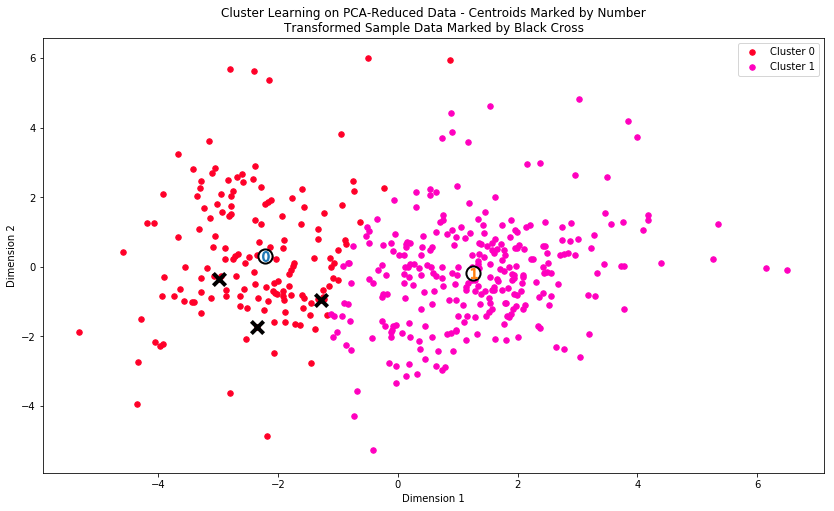

In [21]:
i = 2
clusterer = GaussianMixture(n_components=i, random_state=40).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 实现：数据恢复
上述可视化图表中出现的每个聚类都有一个中心点。这些中心（或均值）并不是来自数据中的特定数据点，而是相应聚类预测的所有数据点的*平均值*。对于创建客户细分这个问题来说，聚类的中心点对应的是*该细分的平均客户数量*。因为数据目前是降维状态并且进行了对数缩放，我们可以通过应用逆转换从这些数据点中还原代表性客户支出。

你需要在下面的代码块中实现以下步骤：
 - 使用 `pca.inverse_transform` 对 `centers` 应用逆转换，并将新的中心点赋值给 `log_centers`。
 - 使用 `np.exp` 对 `log_centers` 应用 `np.log` 的逆函数，并将真正的中心点赋值给 `true_centers`。

In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3552.0  7837.0  12219.0   870.0            4696.0         962.0
Segment 1  8953.0  2114.0   2765.0  2075.0             353.0         732.0

### 问题 8

* 思考上述代表性数据点的每个产品类别的总购买成本，并参考该项目开头的数据集统计学描述（具体而言，查看各个特征点的均值）。每个客户细分可以表示什么样的场所集合？

**提示：**分配给 `'Cluster X'`  的客户应该与 `'Segment X'` 的特征集表示的场合最一致。思考每个细分表示所选特征点的什么值。参考这些值并通过均值了解它们表示什么样的场合。

**答案：**

均值如下所示：
           Fresh	        Milk	    Grocery	      Frozen	  Detergents_Paper	  Delicatessen
mean	12000.297727	5796.265909	  7951.277273	3071.931818	    2881.493182	      1524.870455


通过与均值比较，
Segment0 在Milk, Grocery, Detergents_paper上的消费比较多，代表咖啡厅；
Segment1 在Fresh, Frozen的消费相对多一些，总体来说在每种产品都有消费，但消费都不是很高，代表市场或者零售店



### 问题 9

* 对于每个样本点，* **问题 8** *中的哪个客户细分最能代表它？
* 每个样本点的预测与此细分保持一致吗？*

运行以下代码块，看看每个样本点预测属于哪个聚类。

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**答案：**
1. 对于0，1样本点，cluster0最能代表它；2样本点（Fresh和Milk的消费都超过平均值）可能属于cluster0也可能属于cluster1
2. 样本点预测基本与细分保持一致。


## 总结

在最后一部分，你将研究可以对聚类数据采用的方式。首先，你将思考特定的送货方案对不同的客户群（即***客户细分***）有何不同影响。接着，你将思考为每个客户设定标签（该客户属于哪个*细分*）可以如何提供关于客户数据的额外特征。最后，你将比较***客户细分***和数据中的隐藏变量，看看聚类分析是否发现了特定的关系。

### 问题 10
公司在对自己的产品或服务做出小小的改变时，经常会运行 [A/B 测试](https://en.wikipedia.org/wiki/A/B_testing)，判断这项改变对客户有正面还是负面影响。批发商打算将送货服务从目前的一周 5 天改成一周 3 天。但是，批发商仅针对会为其带来正面影响的客户做出这一送货服务变更。 

* 批发商可以如何使用客户细分判断哪些客户（如果有）对送货服务变化保持正面响应。？*

**提示：**可以假设变化会平等地影响到所有客户吗？如何判断对哪些客户群的影响最大？

**答案：**
* 不能假设会平等地影响所有客户，因为不同群体的客户对产品需求不同，而有些产品需要每天都送货，有些则不需要；
* 对于需要Grocery, Detergents_paper量大的客户群，可能不需要每天送货，从5天改成3天影响可能不大；
* 但对需要Fresh量多的客户群，最好每天都送货，从5天改成3天影响可能很大。

### 问题 11
在使用聚类技巧时，我们从原始无标签数据中得出了额外的结构。因为每个客户都属于某个最合适的***客户细分***（取决于应用的聚类算法），我们可以将*”客户细分“*看作数据的**工程化特征**。假设批发商最近吸引了 10 个新的客户，每个客户都能为每个产品类别带来预期的年收入（估值）。了解这些估值后，批发商希望将每个新客户归类到一个***客户细分***，以确定最合适的送货服务。 
* 批发商如何仅使用估计的产品开支和**客户细分**数据为新客户设定标签？

**提示：**可以使用监督式学习器对原始客户进行训练。目标变量可以是什么？

**答案：**
通过监督学习对原数据进行训练。features为各产品的需求（或是收入），labels为通过无监督聚类得到的cluster0和cluster1（即客户群体细分）。得到训练好的模型后，把估计的产品开支作为新的features输入，则能得到所属的分类群体。


### 可视化底层分布图

在该项目开始时，我们提到我们会从数据集中排除 `'Channel'` 和 `'Region'` 特征，以便在分析过程中侧重于客户产品类别。通过向数据集中重新引入 `'Channel'` 特征，在考虑之前对原始数据集应用的相同 PCA 降维算法时，发现了有趣的结构。

运行以下代码块，看看每个数据点在降维空间里为何标记成 `'HoReCa'`（酒店/餐厅/咖啡厅）或 `'Retail'`。此外，你将发现样本数据点在图中被圈起来了，这样可以标识它们的标签。

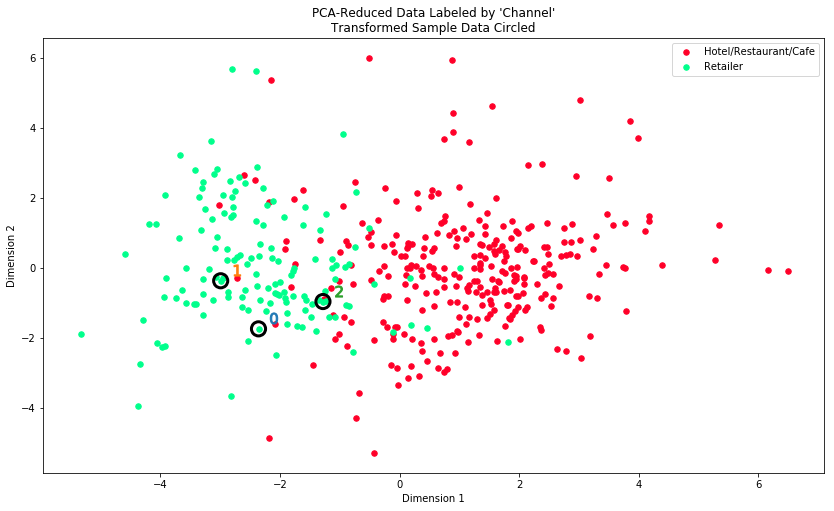

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

* 你所选的聚类算法和聚类数量与此酒店/餐厅/咖啡厅客户到零售客户底层分布图相比，效果如何？
* 根据此分布图，有任何客户细分可以完全分类为”零售“或”酒店/餐厅/咖啡厅“客户吗？
* 你认为这些分类与之前的客户细分定义保持一致吗？

**答案：**
1. 大体上还是相似的。但聚类算法的分界线会更明显些
2. 没有，因为聚类分类时是通过判断每个样本属于各个类的概率，不太可能存在某一样本属于某类的概率为1
3. 基本一致。

> **注意**：完成所有代码实现部分并成功地回答了上述每个问题后，你可以将该 iPython Notebook 导出为 HTML 文档并获得最终要提交的项目。为此，你可以使用上面的菜单或依次转到
> *文件 -> 下载为 -> HTML (.html)**。在提交时，请同时包含该 notebook 和完成的文档。